# Tarea 187 - Resolver la falta de datos II

## Data Augmentation de imágenes

En Python contamos con varias librerías que nos ayudan a realizar aumento de datos de imágenes. 
Veamos el ejemplo con la imágen de la zapatilla y sus posibles transformaciones con la ayuda de 'imgaug'.

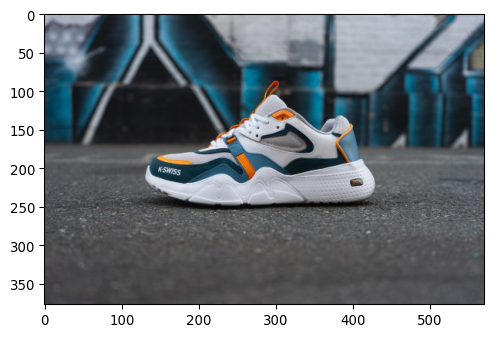

In [4]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import imageio.v2 as imageio
%matplotlib inline
ia.seed(1)

image = imageio.imread("zapatilla.jpg")
ia.imshow(image)

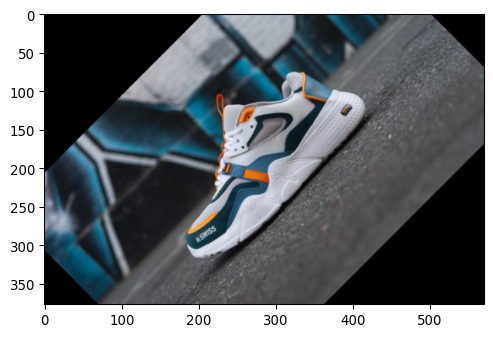

In [5]:
# Lo podemos rotar con la siguiente función.
rotate = iaa.Affine(rotate=-45)
image_aug = rotate(image=image)

ia.imshow(image_aug)

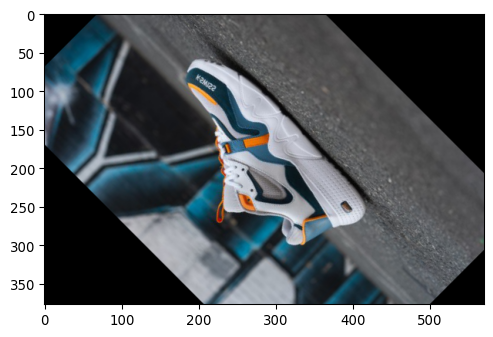

In [6]:
# Volteo vertical
flip = iaa.Flipud(1.0)
image_aug2 = flip(image=image_aug)
ia.imshow(image_aug2)

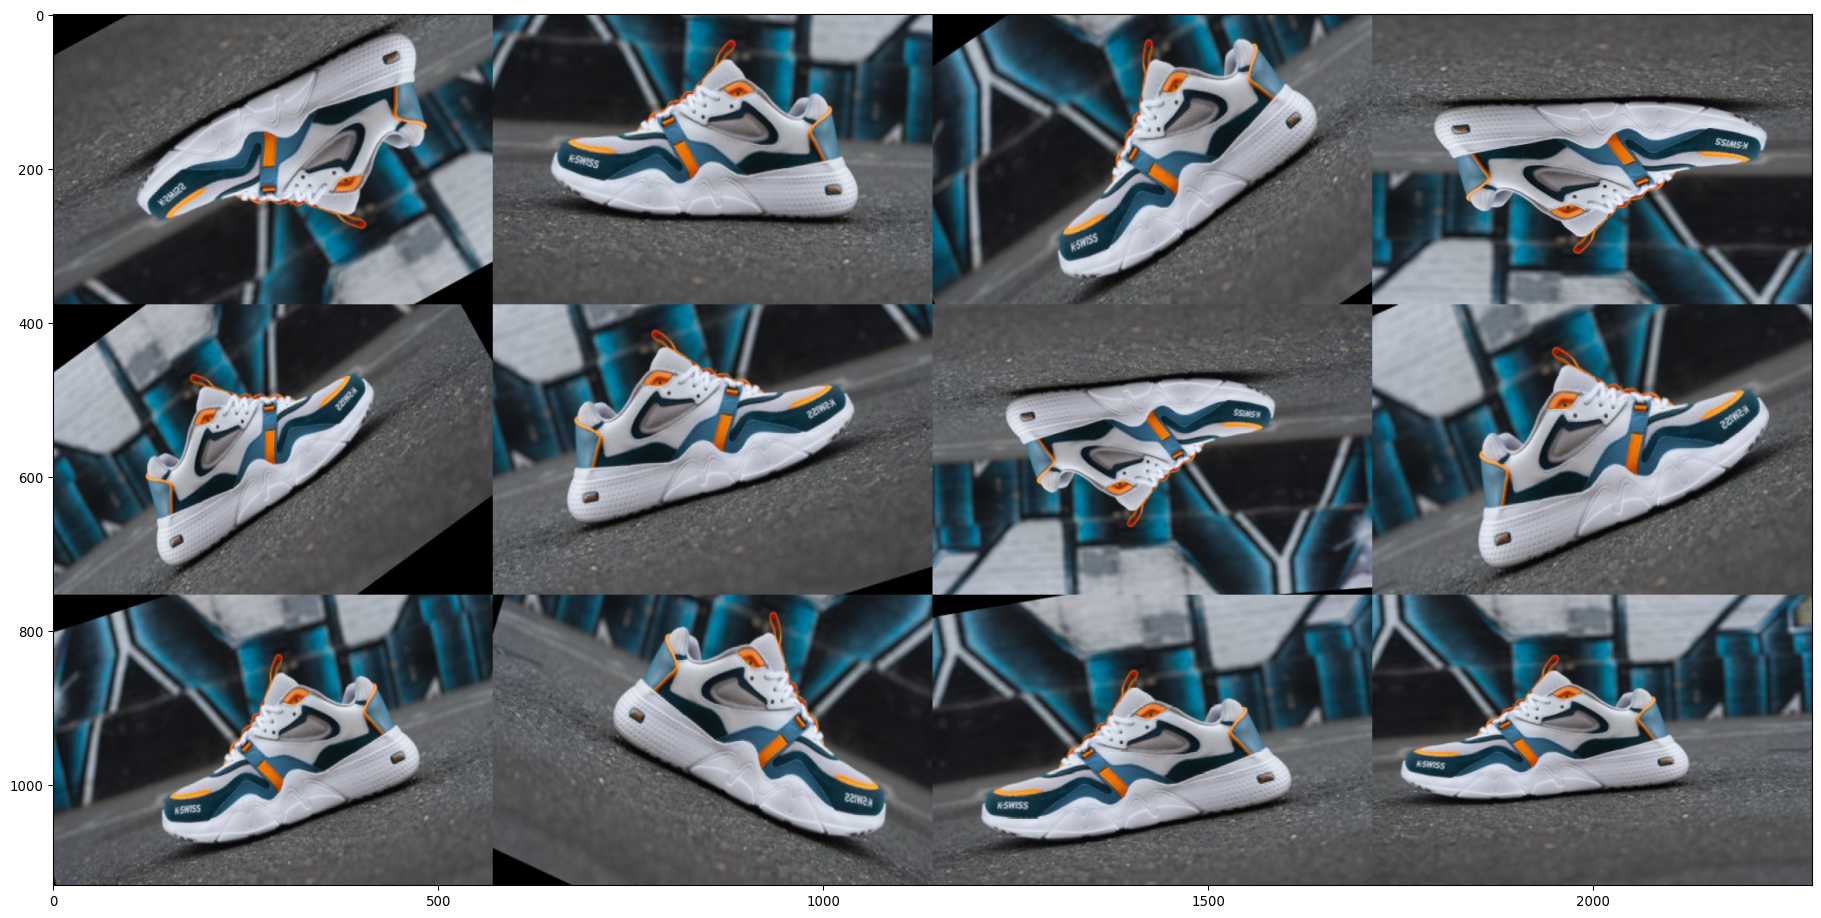

In [7]:
# Generamos varias muestras aleatorias con diversas transformaciones.
# rotar, flip, vertical, horizontal y recorte.
seq = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45)),
    iaa.Flipud(0.5),
    iaa.Fliplr(0.5),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = [seq(image=image) for _ in range(12)]
ia.imshow(ia.draw_grid(images_aug, cols=4, rows=3))

## Data Augmentation de texto

Cuando nos enfrentamos a problemas de NLP (Natural Language Processing) con datasets que sean textos tendremos que usar la lógica de la semántica y la sintaxis para poder crear nuevas muestras.

Supongamos que tenemos una crítica de restaurant para hacer análisis de sentimiento que el dice:

“Me lo he pasado muy bien, buen servicio y comida sabrosa”.

Esto se corresponde con una puntuación positiva. Para ampliar el dataset podríamos intercambiar
algunos adjetivos y seguiría teniendo sentido manteniendo una puntuación positiva:

“Me lo he pasado genial, buena atención y comida rica”.

Otra opción podría ser alterar el orden de las oraciones:

“Comida sabrosa, Me lo he pasado muy bien, buen servicio”

Y podríamos combinar las dos técnicas, creando nuevas muestras.

Otra técnica que se utiliza es la de tener en cuenta “errores de tipeo”, entonces podríamos agregar muestras como:

“Me lo e pazado muy vien, buen serbicio y comid sabrsa”.


In [1]:
# Vemos que nos devuelve varias sentencias que no modifican el significado original y podemos ampliar nuestro dataset original.
from textattack.augmentation import EmbeddingAugmenter
augmenter = EmbeddingAugmenter()

s1 = 'I have a great time at the restaurant.'
print(augmenter.augment(s1))
s2 = 'Very good service'
print(augmenter.augment(s2))
s3 = 'They had really tasty food.'
print(augmenter.augment(s3))

['I have a awesome time at the restaurant.']
['Enormously good service']
['They had really tasty alimentary.']


['They had really tasty nourishment.']

## Data Augmentation de sonido

Entre otras transformaciones, podemos hacer:

- Inyección de Ruido.
- Cambio en la velocidad.
- Shifting (fast forward/back forward).
- Alteración de onda, graves y agudos y más.

Si bien no se profundizará en este artículo, aplicando este tipo de transformaciones se obtendrán
varias muestras a partir del dataset inicial. Para ello se cuenta con la ayuda de la famosa librería 
Python para audio llamada “Librosa”.

## Data Augmentation en datasets (tipo tabular)

Los datasets de tipo tabular son archivos estructurados en filas y columnas.  Para realizar el 
Data Augmentation deberemos apoyarnos en la teoría de “Vecinos cercanos” **K-nearest neighbours.**
Este es un algoritmo sencillo que almacena todos los casos disponibles y clasifica los nuevos datos 
o casos basándose  en una medida de similitud. Se utiliza sobre todo para clasificar un punto de datos 
en función de la clasificación de sus vecinos.

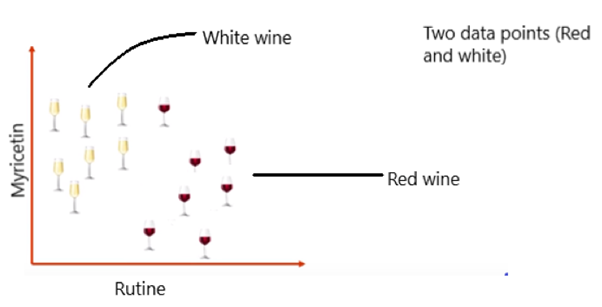

Por ejemplo, tenemos que averiguar cuáles son los vecinos en este caso. Digamos que k = 5 y que el nuevo punto de datos se clasifica por la mayoría de los votos de sus cinco vecinos y el nuevo punto se clasificaría como rojo ya que cuatro de los cinco vecinos son rojos.

En general, en la práctica, la elección del valor de k es k = sqrt(N), donde N representa el número de muestras de su conjunto de datos de entrenamiento.

Teniendo en cuenta lo anterior, podemos utilizar técnicas de **Oversampling** que se encargan de crear puntos “intermedios” basándose en las muestras existentes teniendo en cuenta todas las variables (features).

Uno de los algoritmos más usados es el llamado **SMOTE** (Synthetic Minority Oversampling Technique) que utiliza k-nearest neighbour para crear muestras artificiales.

Lo que hace este algoritmo es tomar un punto de la “clase minoritaria” (a la que queremos aumentar sus muestras) y luego tomar los “k-vecinos” del dataset y crear nuevas muestras en puntos intermedios entre ellos, teniendo en cuenta todas las dimensiones.

En el ejemplo crearemos muestras con los precios de inmuebles de Chicago y San Antonio. Esta vez nuestra clase “mayoritaria” será San Antonio y utilizaremos SMOTE para crear muestras sintéticas y emparejar el dataset.

In [2]:
# Importamos las librerías que utilizaremos y creamos el dataset.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.DataFrame({"Ciudad":["Chicago","Chicago","Chicago","Chicago","Chicago","Chicago",
              "S.Antonio","S.Antonio","S.Antonio","S.Antonio","S.Antonio","S.Antonio","S.Antonio","S.Antonio","S.Antonio"],
                   "Ambientes":[3,3,2,1,1,1,
                                1,1,2,2,4,4,5,5,5],
                   "Precio":[20000,27000,15500,10000,12000,9000,
                          50000,53000,68000,65000,120000,110000,130000,125000,120000]})
df[df.Ciudad == 'Chicago']

,Ciudad,Ambientes,Precio
0,Chicago,3,20000
1,Chicago,3,27000
2,Chicago,2,15500
3,Chicago,1,10000
4,Chicago,1,12000
5,Chicago,1,9000


In [3]:
# Convertimos los nombres de las ciudades a valor numérico y lo llamaremos “label”.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encoder = le.fit(df.Ciudad)
CiudadEncoded = encoder.transform(df.Ciudad)
df["label"] = CiudadEncoded
df

,Ciudad,Ambientes,Precio,label
0,Chicago,3,20000,0
1,Chicago,3,27000,0
2,Chicago,2,15500,0
3,Chicago,1,10000,0
4,Chicago,1,12000,0
5,Chicago,1,9000,0
6,S.Antonio,1,50000,1
7,S.Antonio,1,53000,1
8,S.Antonio,2,68000,1
9,S.Antonio,2,65000,1


<AxesSubplot:xlabel='label', ylabel='count'>

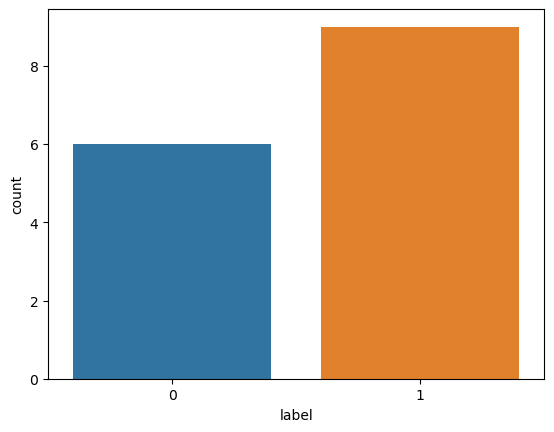

In [5]:
# Comprobamos el desbalance de 6 contra 9 muestras.
sns.countplot(data=df, x=df['label'])

<AxesSubplot:xlabel='Ambientes', ylabel='Precio'>

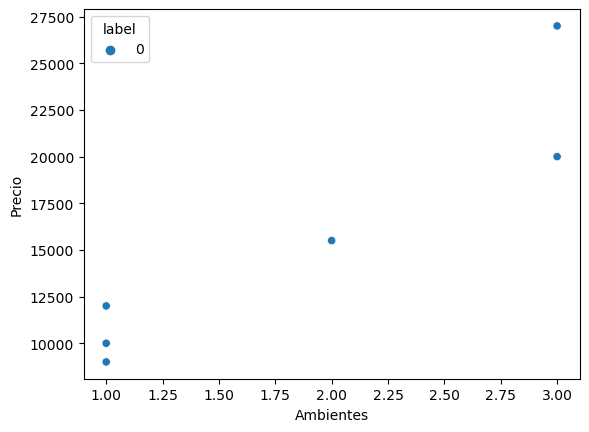

In [6]:
# Graficamos las muestras de Chicago, el precio en relación a la cantidad de Ambientes.
muestras_chicago = df[df.Ciudad=='Chicago']
sns.scatterplot(data = muestras_chicago, x ='Ambientes', y = 'Precio', hue = 'label')

In [8]:
# Ahora aplicamos SMOTE para crear las nuevas muestras con el método “fit_reasample()”.
from imblearn.over_sampling import SMOTE

# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

smote = SMOTE(sampling_strategy="all", random_state = 1)
X, y = smote.fit_resample(df[['Ambientes', 'Precio']], df['label'])

df_oversampler = pd.DataFrame(X, columns = ['Ambientes', 'Precio'])
df_oversampler['label'] = y
df_oversampler

,Ambientes,Precio,label
0,3,20000,0
1,3,27000,0
2,2,15500,0
3,1,10000,0
4,1,12000,0
5,1,9000,0
6,1,50000,1
7,1,53000,1
8,2,68000,1
9,2,65000,1


<AxesSubplot:xlabel='label', ylabel='count'>

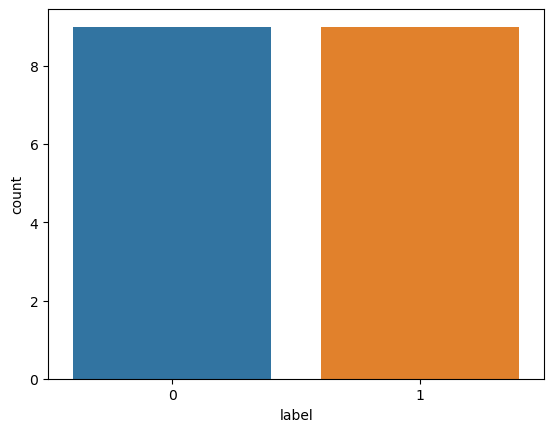

In [10]:
# Vemos que las tres últimas filas corresponden al label cero que es Chicago.
sns.countplot(data=df_oversampler, x=df_oversampler['label'])

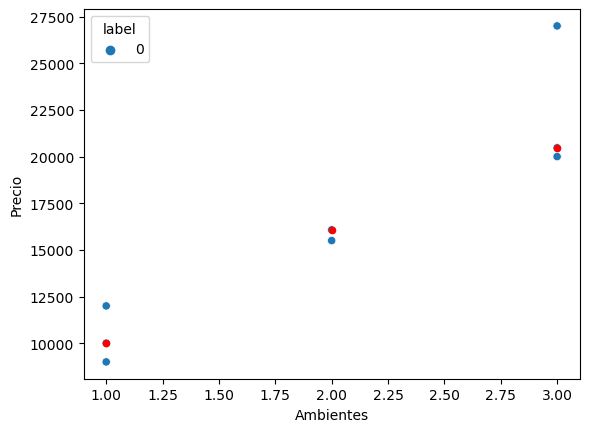

In [11]:
# El dataset quedó emparejado. Veamos dónde se agregaron esas 3 nuevas muestras.
muestras_chicago = df_oversampler[df_oversampler.label == 0]
sns.scatterplot(data = muestras_chicago, x ='Ambientes', y = 'Precio', hue = 'label')

plt.scatter(df_oversampler.Ambientes[15:], df_oversampler.Precio[15:], c='red', s=20)

## Bibliografía

- https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e
- https://towardsdatascience.com/working-with-unbalanced-dataset-8405465630d7
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html